In [14]:
import pandas as pd
import matplotlib.pyplot as plotter
import csv
import re

In [34]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [9]:
Name_Conversion = {}
with open("Data/Food_Atlas2015/Long Names.txt") as longFile:
    with open("Data/Food_Atlas2015/Short Names.txt") as shortFile:
        longReader = longFile.readlines()
        shortReader = shortFile.readlines()
        longReader = [x.strip() for x in longReader]
        shortReader = [y.strip() for y in shortReader]
        Name_Conversion = dict(zip(shortReader,longReader))
    

In [10]:
Name_Conversion

{'CensusTract': 'Census tract',
 'County': 'County',
 'GroupQuartersFlag': 'Group quarters, tract with high share',
 'HUNVFlag': 'Vehicle access, tract with low vehicle access',
 'LA1and10': 'Low access tract at 1 mile for urban areas and 10 miles for rural areas',
 'LA1and20': 'Low access tract at 1 mile for urban areas and 20 miles for rural areas',
 'LALOWI05_10': 'Low access, low-income population at 1/2 mile for urban areas and 10 miles for rural areas, number',
 'LALOWI1_10': 'Low access, low-income population at 1 mile for urban areas and 10 miles for rural areas, number',
 'LALOWI1_20': 'Low access, low-income population at 1 mile for urban areas and 20 miles for rural areas, number',
 'LAPOP05_10': 'Low access, population at 1/2 mile for urban areas and 10 miles for rural areas, number',
 'LAPOP1_10': 'Low access, population at 1 mile for urban areas and 10 miles for rural areas, number',
 'LAPOP1_20': 'Low access, population at 1 mile for urban areas and 20 miles for rural ar

In [2]:
food_atlas_data = pd.read_csv("Data/Food_Atlas2015/Food_Atlas2015.csv")
food_atlas_data.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [49]:
list(food_atlas_data)

['Census tract',
 'State',
 'County',
 'Urban tract',
 'Population, tract total',
 'Housing units, total',
 'Group quarters, tract with high share',
 'Group quarters, tract population residing in, number',
 'Group quarters, tract population residing in, share',
 'Low income and low access tract measured at 1 mile for urban areas and 10 miles for rural areas',
 'Low income and low access tract measured at 1/2 mile for urban areas and 10 miles for rural areas',
 'Low income and low access tract measured at 1 mile for urban areas and 20 miles for rural areas',
 'Low income and low access tract using vehicle access or low income and low access tract measured at 20 miles',
 'Vehicle access, tract with low vehicle access',
 'Low income tract',
 'Tract poverty rate',
 'Tract median family income',
 'Low access tract at 1 mile for urban areas and 10 miles for rural areas',
 'Low access tract at 1/2 mile for urban areas and 10 miles for rural areas',
 'Low access tract at 1 mile for urban areas

In [11]:
food_atlas_data.rename(columns = Name_Conversion,inplace = True)

In [12]:
food_atlas_data.head()

,Census tract,State,County,Urban tract,"Population, tract total","Housing units, total","Group quarters, tract with high share","Group quarters, tract population residing in, number","Group quarters, tract population residing in, share",Low income and low access tract measured at 1 mile for urban areas and 10 miles for rural areas,...,"Tract seniors age 65+, number","Tract White population, number","Tract Black or African American population, number","Tract Asian population, number","Tract Native Hawaiian and Other Pacific Islander population, number","Tract American Indian and Alaska Native population, number","Tract Other/Multiple race population, number","Tract Hispanic or Latino population, number","Tract housing units without a vehicle, number","Tract housing units receiving SNAP benefits, number"
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


### Location breakdown

In [41]:
county_food_atlas_groupdata = food_atlas_data.groupby(['State','County'])[['Population, tract total',"Low access, population at 1 mile for urban areas and 20 miles for rural areas, number"]].sum()
county_food_atlas_groupdata['ratio']=county_food_atlas_groupdata['Low access, population at 1 mile for urban areas and 20 miles for rural areas, number']/county_food_atlas_groupdata['Population, tract total']
county_food_atlas_groupdata.reset_index(inplace=True)
county_food_atlas_groupdata.head()

,State,County,"Population, tract total","Low access, population at 1 mile for urban areas and 20 miles for rural areas, number",ratio
0,Alabama,Autauga,54571,11064.872922,0.202761
1,Alabama,Baldwin,182265,43486.806226,0.238591
2,Alabama,Barbour,27457,1182.176872,0.043056
3,Alabama,Bibb,22915,0.000000,0.000000
4,Alabama,Blount,57322,3900.420369,0.068044


In [42]:
code_lookups = pd.read_csv('Data/mapping_info/zip_codes_states.csv')
code_lookups.drop_duplicates(['state','county'],keep='last',inplace=True)
code_lookups['state_name'] = code_lookups.apply(lambda x: states.get(x['state'],None),axis=1)
code_lookups.head()

,zip_code,latitude,longitude,city,state,county,state_name
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas,Puerto Rico
3,602,18.393103,-67.180953,Aguada,PR,Aguada,Puerto Rico
7,606,18.172947,-66.944111,Maricao,PR,Maricao,Puerto Rico
8,610,18.288685,-67.139696,Anasco,PR,Anasco,Puerto Rico
14,617,18.447092,-66.544255,Barceloneta,PR,Barceloneta,Puerto Rico


In [47]:
pd.read_csv('Data/mapping_info/zip_codes_states.csv').head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [43]:
county_food_atlas_loc_data = county_food_atlas_groupdata.merge(code_lookups, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
county_food_atlas_loc_data.head()

,State,County,"Population, tract total","Low access, population at 1 mile for urban areas and 20 miles for rural areas, number",ratio,zip_code,latitude,longitude,city,state,county,state_name
0,Alabama,Autauga,54571,11064.872922,0.202761,36749,32.510383,-86.813834,Jones,AL,Autauga,Alabama
1,Alabama,Baldwin,182265,43486.806226,0.238591,36580,30.468691,-87.703035,Summerdale,AL,Baldwin,Alabama
2,Alabama,Barbour,27457,1182.176872,0.043056,36072,31.826055,-85.166028,Eufaula,AL,Barbour,Alabama
3,Alabama,Bibb,22915,0.000000,0.000000,36793,32.891444,-86.983385,Lawley,AL,Bibb,Alabama
4,Alabama,Blount,57322,3900.420369,0.068044,35133,33.845846,-86.586724,Remlap,AL,Blount,Alabama


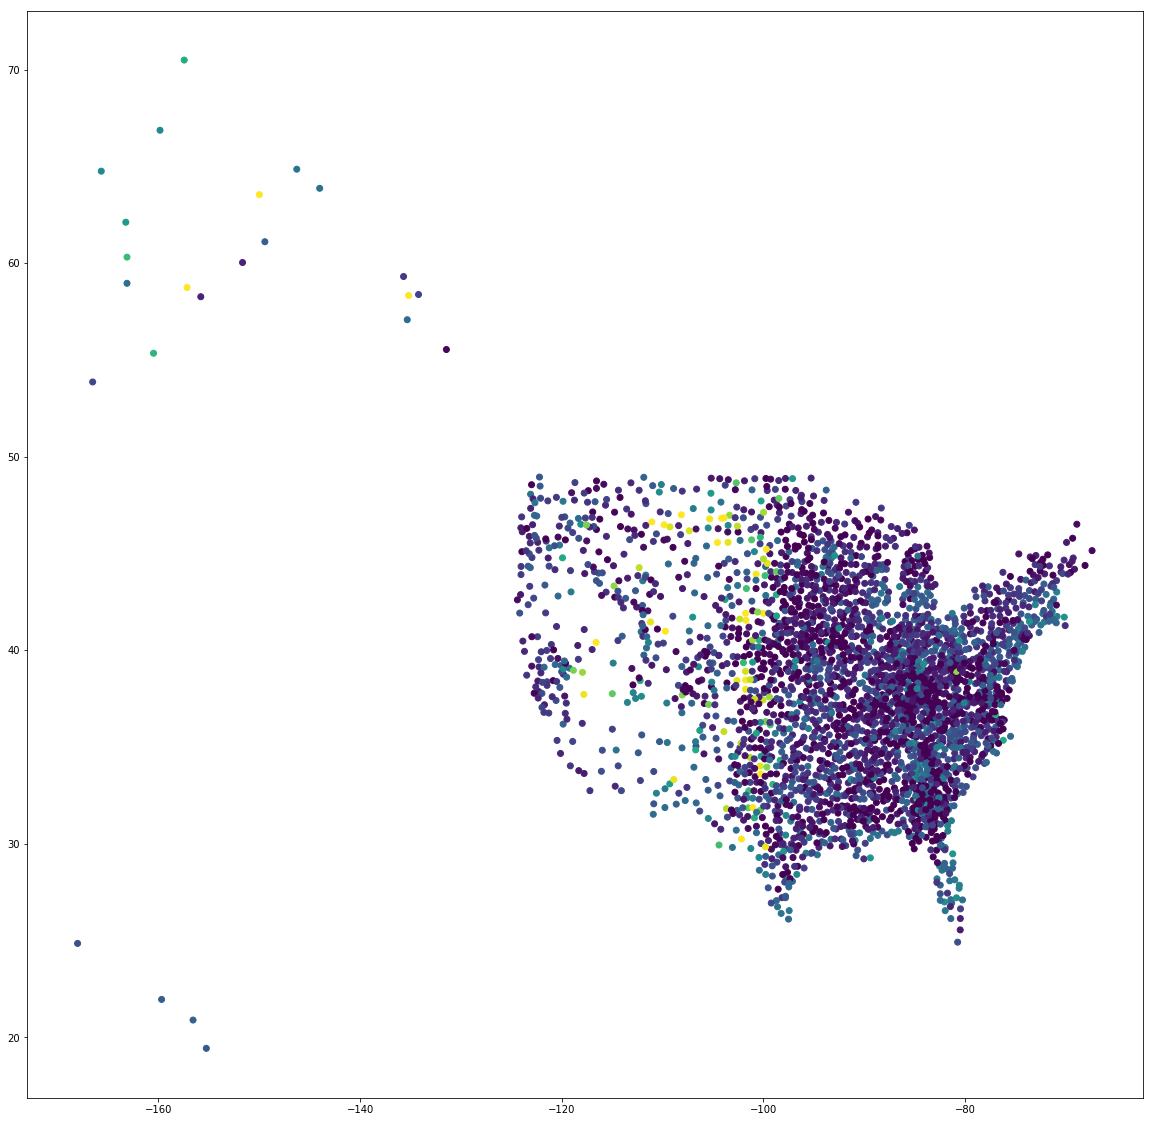

In [46]:

plotter.figure(figsize=(20,20))
plotter.scatter(county_food_atlas_loc_data['longitude'], county_food_atlas_loc_data['latitude'], c=county_food_atlas_loc_data['ratio']*100.0)
plotter.show()

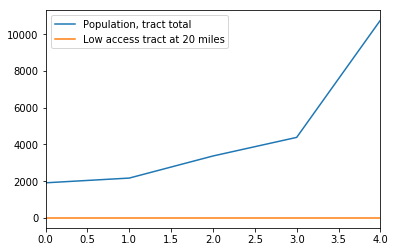

In [17]:
food_atlas_data[['Population, tract total','Low access, population at 1 mile for urban areas and 20 miles for rural areas, number']].head().plot()
plotter.show()

### Racial breakdown